In [1]:
#The following will use different options to get the Moving average.

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
AAPL= pd.read_csv("C:/Users/franc/Desktop/Google Colab/Data/AAPL.csv")
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-03,203.279999,204.440002,202.690002,204.410004,201.999237,11362000
1,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500
2,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600
3,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000
4,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100
...,...,...,...,...,...,...,...
248,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
249,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500
250,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800
251,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300


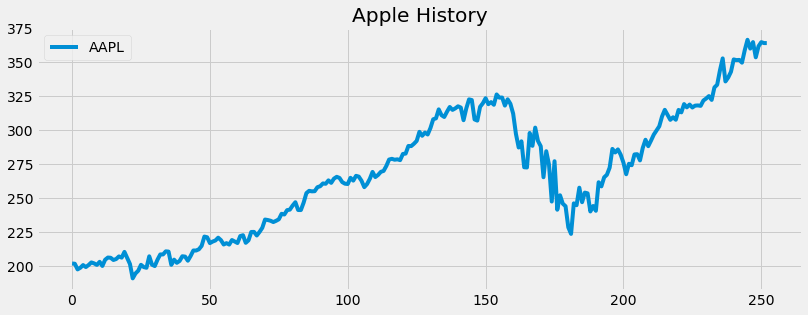

In [4]:
#Visualize the data:
plt.figure(figsize=(12.2, 4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple History')
plt.legend(loc='upper left')
plt.show();

In [5]:
#Simple Moving average window 30 days:
SMA30=pd.DataFrame()
SMA30['Adj Close Price']=AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,334.765666
249,336.567999
250,338.229332
251,339.928331


In [6]:
#Create a simple moving average for 100 days:
SMA100=pd.DataFrame()
SMA100['Adj Close Price']=AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,298.105444
249,298.525012
250,298.937371
251,299.386811


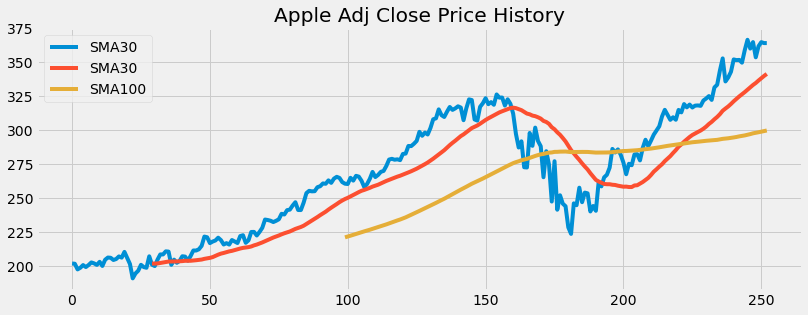

In [8]:
#Visualize the data:
plt.figure(figsize=(12.2,4.5))
plt.plot(AAPL['Adj Close'], label='SMA30')
plt.plot(SMA30['Adj Close Price'], label='SMA30')
plt.plot(SMA100['Adj Close Price'], label='SMA100')
plt.title('Apple Adj Close Price History')
plt.legend(loc='upper left')
plt.show();

In [9]:
#create a new dataframe to store all the data:
data=pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close Price']
data['SMA100']=SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,201.999237,NaN,NaN
1,201.821350,NaN,NaN
2,197.661011,NaN,NaN
3,198.866638,NaN,NaN
4,200.833160,NaN,NaN
...,...,...,...
248,353.630005,334.765666,298.105444
249,361.779999,336.567999,298.525012
250,364.799988,338.229332,298.937371
251,364.109985,339.928331,299.386811


In [10]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
    
    sigPriceBuy=[]#empty list
    sigPriceSell=[]#empty list
    flag=-1
    for i in range(len(data)):
        if data['SMA30'][i]> data['SMA100'][i]:
            if flag !=1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] <data['SMA100'][i]:
            if flag !=0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag=0
            else: 
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [11]:
#store the buy and sell data 
buy_sell=buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

In [12]:
#show the data:
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,201.999237,NaN,NaN,NaN,NaN
1,201.821350,NaN,NaN,NaN,NaN
2,197.661011,NaN,NaN,NaN,NaN
3,198.866638,NaN,NaN,NaN,NaN
4,200.833160,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,353.630005,334.765666,298.105444,NaN,NaN
249,361.779999,336.567999,298.525012,NaN,NaN
250,364.799988,338.229332,298.937371,NaN,NaN
251,364.109985,339.928331,299.386811,NaN,NaN


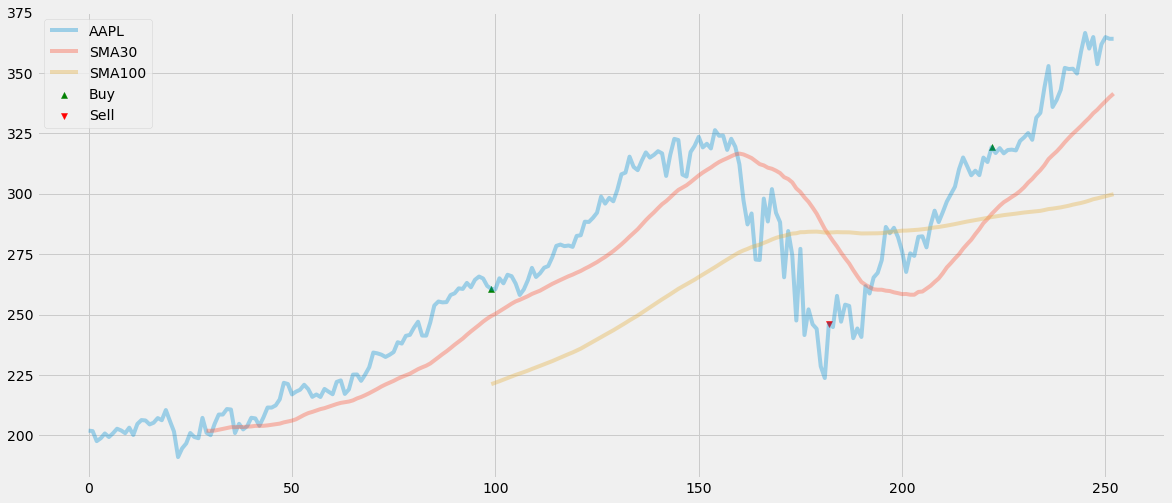

In [13]:
#visualize the data and the strategy to buy and sell the stock:
plt.figure(figsize=(18,8))
plt.plot(data['AAPL'], label='AAPL', alpha=.35)
plt.plot(data['SMA30'], label='SMA30', alpha=.35)
plt.plot(data['SMA100'], label='SMA100',alpha=.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label="Buy", marker="^", color="green")
plt.scatter(data.index, data['Sell_Signal_Price'], label="Sell", marker="v", color="red")
plt.legend(loc='upper left')
plt.show();